# Labelisation: Finding the rotation

## Intro

The goal of this notebook is to find the transformation from the coordinates of the microscope to the coordinates of the final stiched image in Prince

## Set up

In [1]:
from amftrack.util.sys import data_path, get_current_folders, update_plate_info
from amftrack.util.file import chose_file
from amftrack.util.plot import show_image
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment
import os
import matplotlib.pyplot as plt
%matplotlib notebook

/home/ipausers/kahane/Wks/AMFtrack/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Points of interest

Coordinates of the image taken on the microscope

In [2]:
image_names = ["20220324_Plate907_013", "20220324_Plate907_050", "20220324_Plate907_041", "20220324_Plate907_033"]

In [3]:
image_path = [chose_file(os.path.join(data_path, "width1/groundtruth", image_name)) for image_name in image_names]  

In [4]:
i = 0

<IPython.core.display.Javascript object>


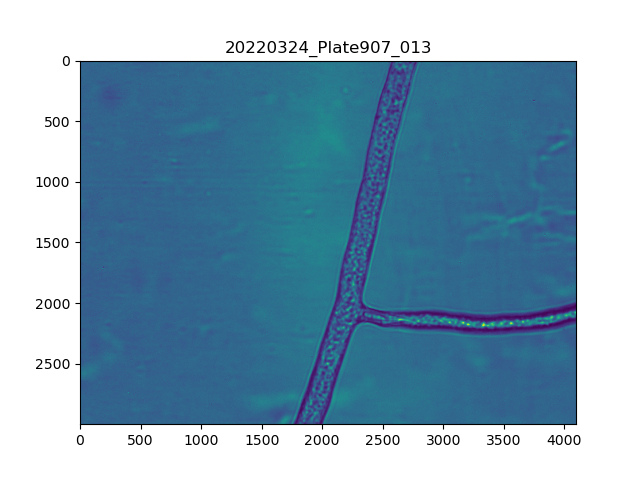

In [5]:
show_image(image_path[i])
plt.title(image_names[i])
i=(i+1)%len(image_path)

Find the position on the image

In [9]:
coord_in_image = [[2213, 2079], [2476, 1780], [2088, 1828], [1640, 1502]]

Coordinates of the image

In [10]:
coord_of_image = [[71020, 39440], [46800, 54180], [47080, 49780], [57920, 51280]]

Original position of the point of interest:

In [11]:
coord = [[coord_in_image[j][i] + coord_of_image[j][i] for i in [0,1]] for j in range(len(coord_of_image))]

In [61]:
coord

[[73233, 41519], [49276, 55960], [49168, 51608], [59560, 52782]]

In [62]:
coord = [[coord[j][i]/50 for i in [0,1]] for j in range(len(coord))]

In [79]:
coord

[[1464.66, 830.38], [985.52, 1119.2], [983.36, 1032.16], [1191.2, 1055.64]]

## Finding the points on the stiched image

#### 1. Snapshot

In [93]:
snapshot_names = ["013_Image__2022-03-24__10-32-04.tiff", "050_Image__2022-03-24__13-03-53.tiff", "040_Image__2022-03-24__11-45-48.tiff", "033_Image__2022-03-24__11-38-53.tiff"]
snapshot_paths = [os.path.join(data_path, "width1/snapshot/20220324_Plate907_Snapshots", s) for s in snapshot_names]

In [98]:
i = 3

<IPython.core.display.Javascript object>


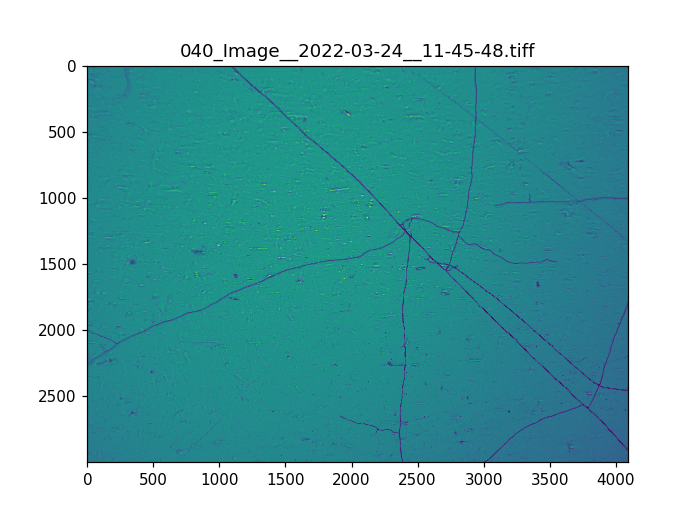

In [97]:
show_image(snapshot_paths[i])
plt.title(snapshot_names[i])
i=(i+1)%len(image_path)

In [90]:
# print image original image around the point of interest

#### 2. Prince image

#### Loading the experiment object:

In [15]:
directory = "/data/felix/width1/full_plates/"
plate_name = "20220325_1423_Plate907"
update_plate_info(directory)
folder_df = get_current_folders(directory)

analysed:   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
selected_df = folder_df.loc[folder_df['folder']==plate_name]

In [28]:
selected_df

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp
12705,/data/felix/width1/full_plates/20220325_1423_P...,907,9,'Carrot','A5','001P100N100C','Y','-',20220321,25,...,True,False,False,True,True,False,False,"25.03.2022, 14:23:",20220325_1423_Plate907,NaN


In [19]:
i = 0

In [20]:
plate = int(list(selected_df['folder'])[i].split('_')[-1][5:])
folder_list = list(selected_df['folder'])
directory_name = folder_list[i]

In [21]:
exp = Experiment(plate, directory)
exp.load(selected_df.loc[selected_df['folder']==directory_name],labeled=False)

2022-03-25 14:23:00


In [48]:
len(exp.nx_graph[0])

2407

#### Get one or several images for each point of interest

In [75]:
i = 2

In [76]:
xs, ys = coord[i]

In [77]:
xs

983.36

In [78]:
exp.find_image_pos(xs, ys, t=0)

([], [array([], dtype=float64), array([], dtype=float64)])

## BROUILLON

In [57]:
import numpy as np
from pymatreader import read_mat
import cv2
from amftrack.plotutil import plot_t_tp1

In [82]:
folder_list = list(selected_df['total_path'])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 1
start = 0

finish = start+2
for folder in folder_list[start:finish]:
    path_snap=folder
    skel_info = read_mat(path_snap+'/Analysis/skeleton_pruned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)

<IPython.core.display.Javascript object>


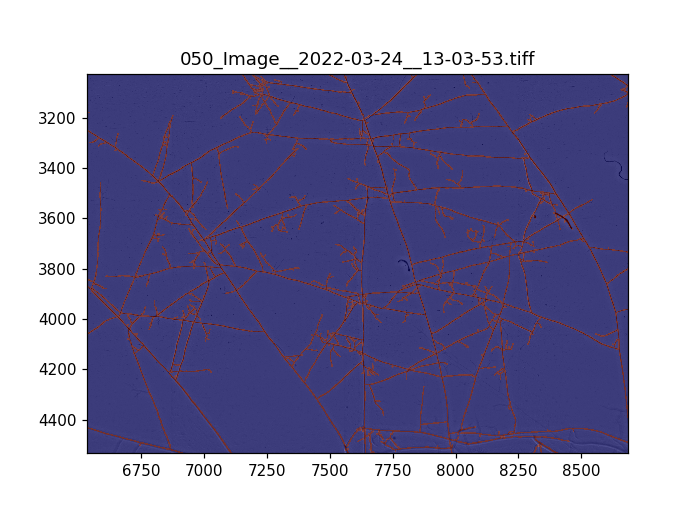

In [83]:
plt.close('all')
start = 0
finish = start + 1
for i in range(start,finish):
    plot_t_tp1([], [], None, None, skels[i], ims[i])